In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [218]:
def life(X):
    count = np.empty_like(X, dtype=int)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            count[i,j] = int(X[i-1, j-1])
            count[i,j] = int(X[i-1, j])
            count[i,j] += int(X[i-1, (j+1)%X.shape[1]])
            count[i,j] += int(X[i, j-1])
            count[i,j] += int(X[i, (j+1)%X.shape[1]])
            count[i,j] += int(X[(i+1)%X.shape[0], j-1])
            count[i,j] += int(X[(i+1)%X.shape[0], j])
            count[i,j] += int(X[(i+1)%X.shape[0], (j+1)%X.shape[1]])
    
    return (count == 3) | (X &(count == 2))

def life_step(X):
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    print(nbrs_count)
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

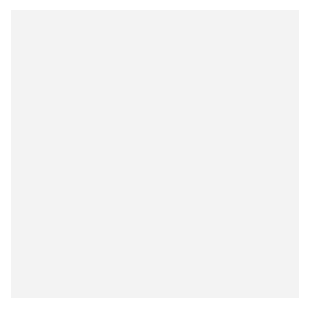

In [219]:
X = np.zeros((20, 20), dtype=bool)
r = np.random.random((10, 10))
X[0:10, 10:20] = (r >= 0.65)

X_blank = np.zeros_like(X)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)  # Make background gray

# initialization function: plot the background of each frame
def init():
    im.set_data(X_blank)
    return (im,)

# animation function.  This is called sequentially
def animate(i):
    im.set_data(animate.X)
    animate.X = life(animate.X)
    return (im,)
animate.X = X

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=500)

HTML(anim.to_jshtml())
